In [4]:
# Setting up to make some CUE graphs 

!pip install cobra


  Using cached cobra-0.21.0-py2.py3-none-any.whl (2.4 MB)
  Using cached depinfo-1.7.0-py2.py3-none-any.whl (8.6 kB)
  Using cached python_libsbml-5.19.0-cp38-cp38-win_amd64.whl (5.0 MB)
  Using cached swiglpk-5.0.3-cp38-cp38-win_amd64.whl (567 kB)
  Using cached diskcache-5.2.1-py3-none-any.whl (44 kB)
  Using cached importlib_resources-5.1.2-py3-none-any.whl (25 kB)
  Using cached pydantic-1.8.1-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached httpx-0.17.1-py3-none-any.whl (68 kB)
  Using cached optlang-1.4.4-py2.py3-none-any.whl (125 kB)
  Using cached rich-6.2.0-py3-none-any.whl (150 kB)
  Using cached httpcore-0.12.3-py3-none-any.whl (55 kB)
  Using cached sniffio-1.2.0-py3-none-any.whl (10 kB)
  Using cached rfc3986-1.4.0-py2.py3-none-any.whl (31 kB)
  Using cached h11-0.12.0-py3-none-any.whl (54 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  Using cached ruamel.yaml.clib-0.2.2-cp38-cp38-win_amd64.whl (120 kB)


In [1]:
import cobra
from cobra.flux_analysis import flux_variability_analysis
import time
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [2]:
import cue_tools
from cue_tools import CUEDef
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Models
# E. coli
# iIT341
# iLJ478
# iAF692
# iNF517
# iHN637
# iJB785
# iJN678
# iJN746
# iJR904
# iND750
# iAF987
# iRC1080

link = ['http://bigg.ucsd.edu/static/models/e_coli_core.mat',
        'http://bigg.ucsd.edu/static/models/iIT341.mat',
       'http://bigg.ucsd.edu/static/models/iLJ478.mat',
        'http://bigg.ucsd.edu/static/models/iAF692.mat',
       'http://bigg.ucsd.edu/static/models/iNF517.mat',
        'http://bigg.ucsd.edu/static/models/iHN637.mat',
        'http://bigg.ucsd.edu/static/models/iJN678.mat',
       'http://bigg.ucsd.edu/static/models/iJN746.mat',
        'http://bigg.ucsd.edu/static/models/iJR904.mat',
       'http://bigg.ucsd.edu/static/models/iND750.mat',
        'http://bigg.ucsd.edu/static/models/iAF987.mat',
       'http://bigg.ucsd.edu/static/models/iRC1080.mat']
# Number of Models - 6
modelnum = 0

In [42]:
#model = cue_tools.loadModelURL(link[modelnum],'mat'
model = cue_tools.loadModelURL('http://bigg.ucsd.edu/static/models/iAF1260.mat','mat')

In [45]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.00349,0,0.00%
cl_e,EX_cl_e,0.00349,0,0.00%
cobalt2_e,EX_cobalt2_e,0.002327,0,0.00%
cu2_e,EX_cu2_e,0.002327,0,0.00%
fe2_e,EX_fe2_e,0.0108,0,0.00%
glc__D_e,EX_glc__D_e,8,6,100.00%
k_e,EX_k_e,0.1308,0,0.00%
mg2_e,EX_mg2_e,0.005816,0,0.00%
mn2_e,EX_mn2_e,0.002327,0,0.00%
mobd_e,EX_mobd_e,0.002327,0,0.00%


In [51]:
CUE_ecoli = CUEDef(model)
CUE_ecoli

,CUE
Def 1,0.628438
Def 2,0.628496
Def 3,0.039668
Def 4,0.039674


In [47]:
# Lets try a different Model 

model2  = cue_tools.loadModelURL('http://bigg.ucsd.edu/static/models/iMM904.mat','mat')

In [48]:

 model2.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,1.611,0,0.00%
o2_e,EX_o2_e,2,0,0.00%
pi_e,EX_pi_e,0.05691,0,0.00%
so4_e,EX_so4_e,0.02225,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-18.02,1,36.29%
etoh_e,EX_etoh_e,-15.82,2,63.70%
for_e,EX_for_e,-0.001488,1,0.00%
h2o_e,EX_h2o_e,-5.64,0,0.00%


In [49]:
CUE_yeast = CUEDef(model2)

In [50]:
print(CUE_yeast)

            CUE
Def 1  0.172441
Def 2  0.699649
Def 3  0.005764
Def 4  0.015723


In [87]:
import matplotlib.pyplot as plt

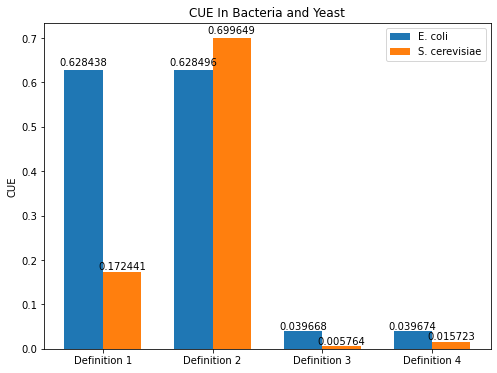

In [119]:
# plotting the CUE Definitions

CUEy = CUE_yeast.iloc[:,0].values
CUEe = CUE_ecoli.iloc[:,0].values

labels = ['Definition 1','Definition 2','Definition 3','Definition 4']

x = np.arange(len(labels))

width = 0.35 # Width of Bars

plt.figure(figsize = (8,6))
ecoliset = plt.bar(x - width/2, CUEe, width, label = 'E. coli')
yeastset = plt.bar(x + width/2, CUEy, width, label = 'S. cerevisiae')
#
plt.ylabel('CUE')
plt.title('CUE In Bacteria and Yeast')
plt.xticks(ticks = x, labels = labels)
plt.legend()

#ax.axes.bar_label(ecoliset, padding = 3)
#ax.bar_label(yeastset, padding = 3)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%f' % float(height),
                ha='center', va='bottom')

autolabel(ecoliset)
autolabel(yeastset)

plt.savefig('CUE_bact_yeast_comparison.png')